# About the Dataset

The objective of this work is to predict the region and country of a terrorist attack using machine learning approaches.
This is a classification model

In [45]:
import numpy as np 
import pandas as pd #
import matplotlib.pyplot as plt 

In [59]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")
df.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#Most of our data have NaN or 0's none of them are of our use, the next step is to clean our data and select only few columns from whole data that acually worth to us.

# Raw data visulization

# This graph visualizes that the dataset has several NaN values (Yellow ones)

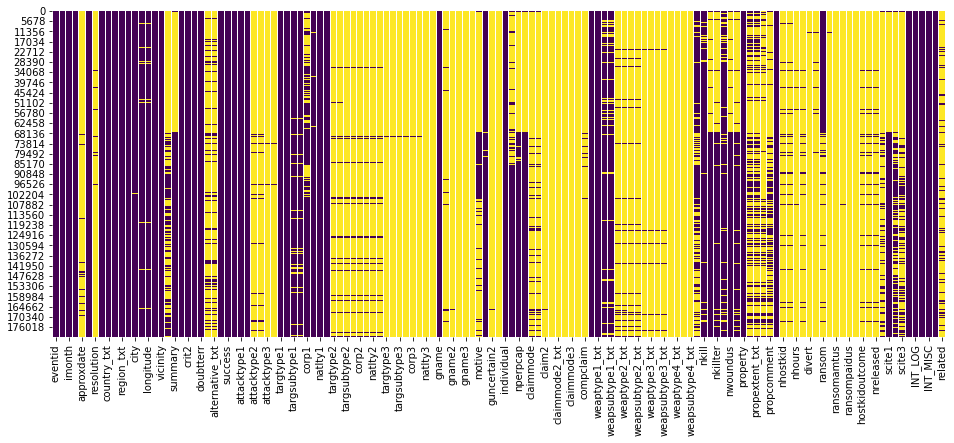

In [48]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

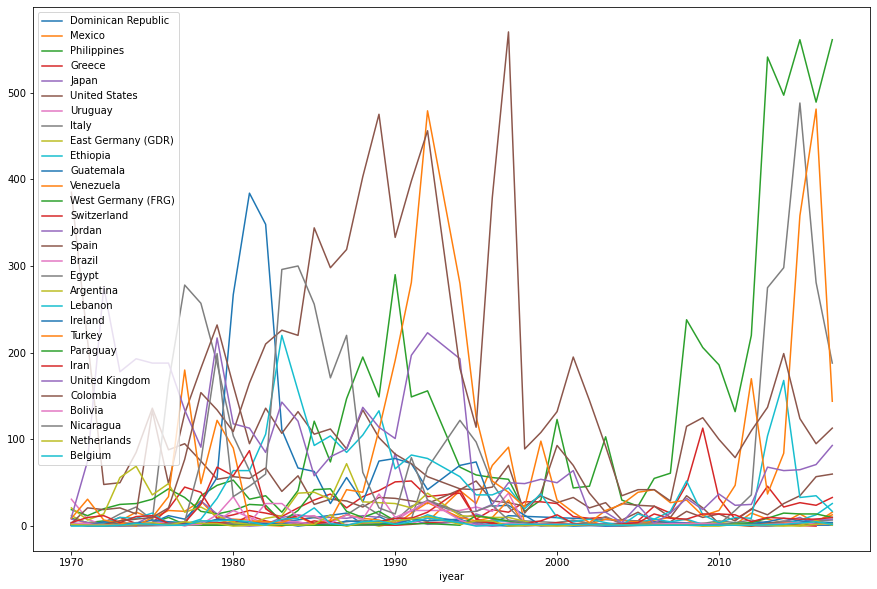

In [49]:
#Attacks in few countries since 1970
fig = plt.figure(figsize=(15,10))
countries = df[['country_txt']].drop_duplicates()
countries.values.tolist()
countries = [country for country_list in countries.values.tolist() for country in country_list]
for country in countries[:30]:
    country_data = df.loc[df['country_txt']==country]
    country_data.groupby('iyear').success.sum().plot(label=country)
plt.legend(loc='best')
plt.show()

In [50]:
#Top 10 countries who face the most terrorist atack since 1970
total_attacks_in_each_country = df.groupby('country_txt').count()
countries_who_faced_max_attacks =  total_attacks_in_each_country.sort_values('success', ascending=False)[:10].index
countries_who_faced_max_attacks.values.tolist()
print("Countries who faced most terrorist attacks since 1970 are: ")
for country in countries_who_faced_max_attacks:
    print(f"{country}") 

Countries who faced most terrorist attacks since 1970 are: 
Iraq
Pakistan
Afghanistan
India
Colombia
Philippines
Peru
El Salvador
United Kingdom
Turkey


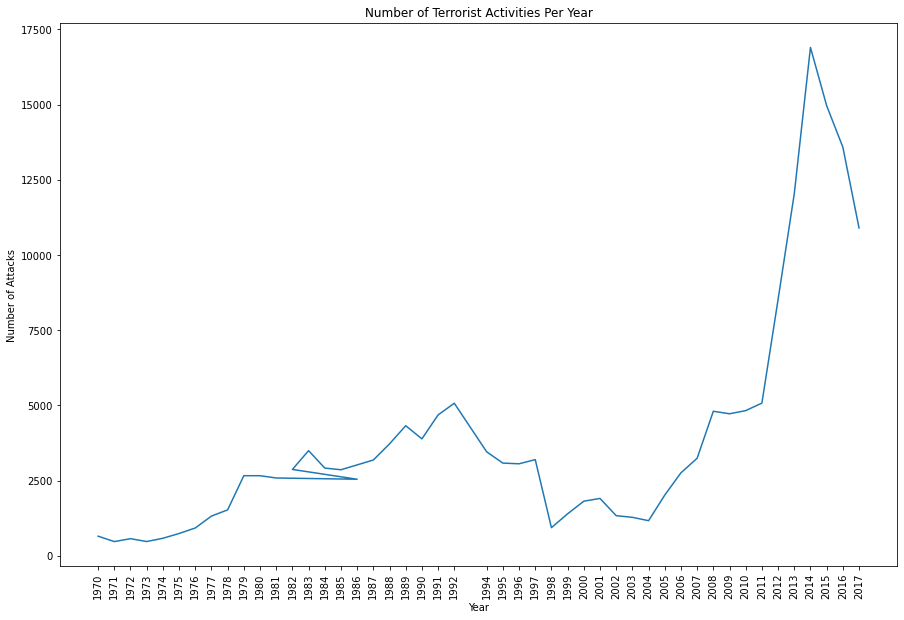

In [51]:
#Number of terrorist attack per year
fig = plt.figure(figsize=(15,10))
x = df['iyear'].unique()
y = df.groupby('iyear').count()['country_txt']
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Activities Per Year')
plt.xticks(x, x, rotation='90') # x, label, rotation
plt.show()

# Cleaning the Dataset

In [52]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [53]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [60]:
# To remove all columns having null values > 5000
for i in df.columns:
    if df[i].isnull().sum()>5000:
        df.drop(columns=i, inplace=True)

In [61]:
df.shape

(181691, 41)

In [62]:
# further reduction of unnecessary columns after looking at the Codebook (documentation)
df.drop(columns=['eventid', 'extended', 'country_txt', 'region_txt', 'specificity', 'vicinity',
                 'crit1', 'crit2', 'crit3', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt',
                 'guncertain1', 'individual', 'weaptype1_txt', 'dbsource', 'INT_MISC'], inplace=True)

In [63]:
df.shape

(181691, 24)

In [54]:
##columns = ['iyear', 'imonth', 'iday', 'country_txt', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt']
#df = df[columns]
#df = df[(df[['iyear','imonth', 'iday']] != 0).all(axis=1)]
#df.dropna()

,iyear,imonth,iday,country_txt,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Named Civilian
5,1970,1,1,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Police,"Police Building (headquarters, station, school)"
6,1970,1,2,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Police Security Forces/Officers
7,1970,1,2,United States,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,Electricity
8,1970,1,2,United States,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy
...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,31,Afghanistan,Maymana,35.921051,64.774544,1,Bombing/Explosion,Business,Retail/Grocery/Bakery
181686,2017,12,31,Somalia,Ceelka Geelow,2.359673,45.385034,1,Armed Assault,Military,Military Checkpoint
181687,2017,12,31,Syria,Jableh,35.407278,35.942679,1,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost
181688,2017,12,31,Philippines,Kubentog,6.900742,124.437908,1,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence


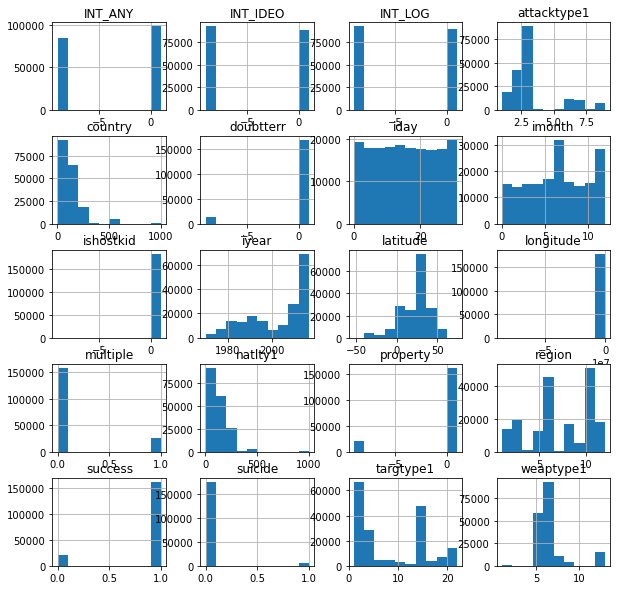

In [64]:
# Numerical data Distribution 
df.hist(figsize=[10,10]);

In [65]:
# Percentage of Null Values
df.isna().mean().round(4) * 100

iyear          0.00
imonth         0.00
iday           0.00
country        0.00
region         0.00
provstate      0.23
city           0.24
latitude       2.51
longitude      2.51
doubtterr      0.00
multiple       0.00
success        0.00
suicide        0.00
attacktype1    0.00
targtype1      0.00
target1        0.35
natlty1        0.86
gname          0.00
weaptype1      0.00
property       0.00
ishostkid      0.10
INT_LOG        0.00
INT_IDEO       0.00
INT_ANY        0.00
dtype: float64

In [68]:
# replacing nan values (refer Codebook.pdf)
df['doubtterr'].fillna(-9, inplace=True)
df['multiple'].fillna(0, inplace=True)
df['natlty1'].fillna(0, inplace=True)
df['ishostkid'].fillna(-9, inplace=True)
df['latitude'].fillna(0, inplace=True)
df['longitude'].fillna(0, inplace=True)

# quantizing dataset
df['provstate'] = pd.factorize(df['provstate'])[0]
df['iyear'] = pd.factorize(df['iyear'])[0]
df['city'] = pd.factorize(df['city'])[0]
df['country'] = pd.factorize(df['country'])[0]
df['target1'] = pd.factorize(df['target1'])[0]
df['gname'] = pd.factorize(df['gname'])[0]
df['natlty1'] = pd.factorize(df['natlty1'])[0]

In [69]:
df.isna().any()

iyear          False
imonth         False
iday           False
country        False
region         False
provstate      False
city           False
latitude       False
longitude      False
doubtterr      False
multiple       False
success        False
suicide        False
attacktype1    False
targtype1      False
target1        False
natlty1        False
gname          False
weaptype1      False
property       False
ishostkid      False
INT_LOG        False
INT_IDEO       False
INT_ANY        False
dtype: bool

# Correlation

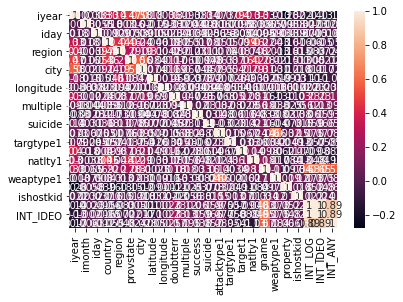

In [70]:
sns.heatmap(df.corr(), annot=True);

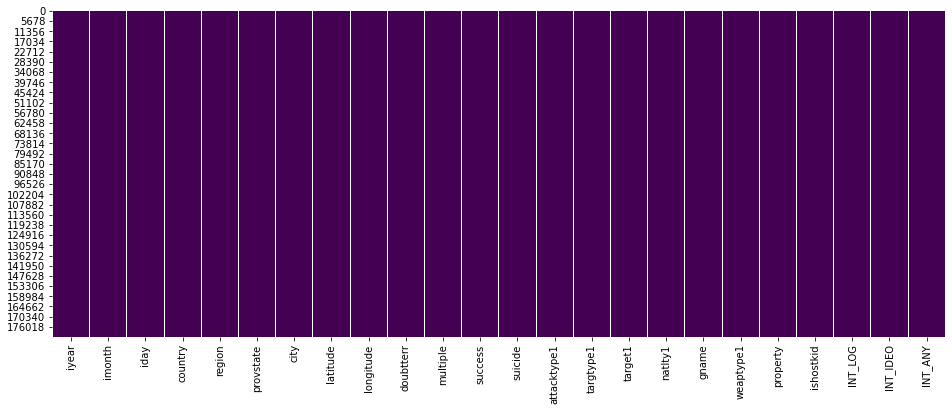

In [71]:
#heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

In [72]:
# saving file for future use
df.to_csv('terrorist_data_pruned.csv', index=False)

In [73]:
df = pd.read_csv('terrorist_data_pruned.csv')

In [74]:
df.head()

,iyear,imonth,iday,country,region,provstate,city,latitude,longitude,doubtterr,...,targtype1,target1,natlty1,gname,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_ANY
0,0,7,2,0,2,-1,0,18.456792,-69.951164,0.0,...,14,0,0,0,13,0,0.0,0,0,0
1,0,0,0,1,1,0,1,19.371887,-99.086624,0.0,...,7,1,1,1,13,0,1.0,0,1,1
2,0,1,0,2,5,1,2,15.478598,120.599741,0.0,...,10,2,2,2,13,0,0.0,-9,-9,1
3,0,1,0,3,8,2,3,37.997490,23.762728,0.0,...,7,3,2,2,6,1,0.0,-9,-9,1
4,0,1,0,4,4,3,4,33.580412,130.396361,-9.0,...,7,4,2,2,8,1,0.0,-9,-9,1


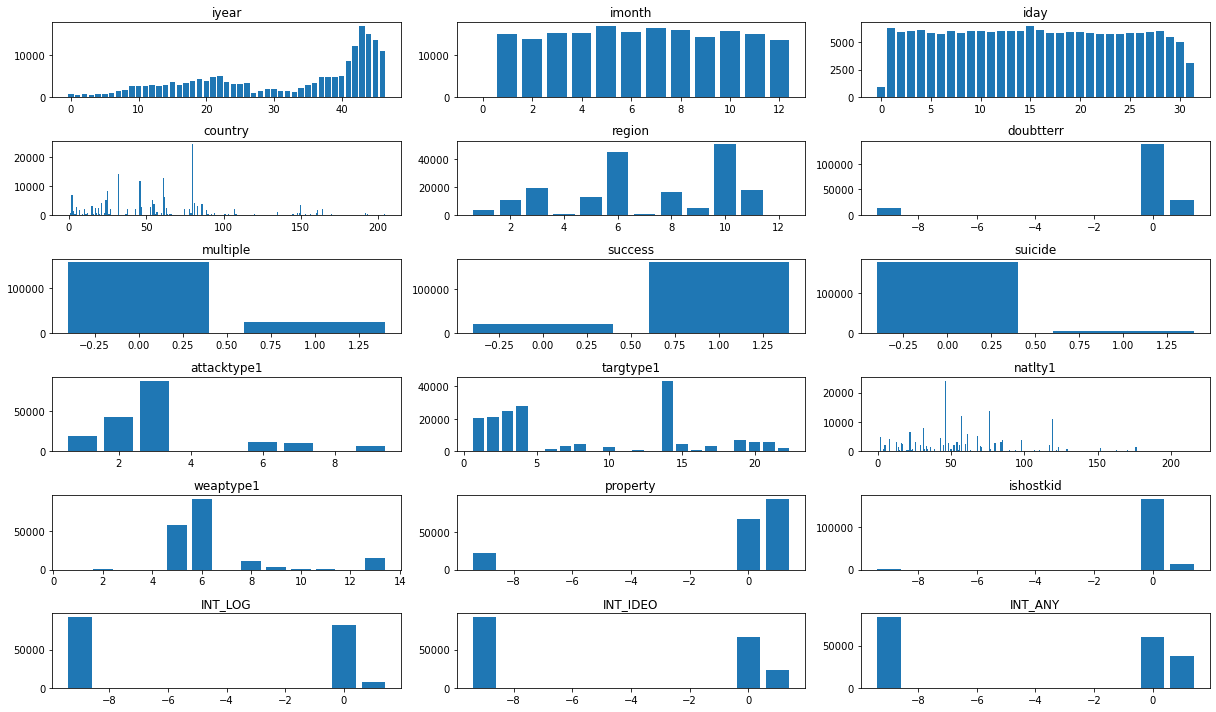

In [75]:
# checking frequency of column values
plt.figure(figsize=(17,10))
i = 0
for col in df.columns:
    if col=='latitude' or col=='longitude' or col=='city' or col=='provstate' or col=='target1' or col=='gname':
        continue
    i += 1
    plt.subplot(6, 3, i)
    num_list = df[col].value_counts()
    plt.bar(num_list.index, num_list.values)
    plt.title(col)
plt.tight_layout()   
plt.show()

In [76]:
# classes having less than 600 samples were dropped from the dataframe to remove skewedness in data
num = df['gname'].value_counts()
res = num.where(num>600).dropna()
res

2       82782.0
2001     7478.0
3024     5613.0
455      4555.0
478      3351.0
2699     3288.0
15       2772.0
46       2671.0
203      2487.0
2819     2418.0
1057     2310.0
78       2024.0
2589     1878.0
631      1630.0
221      1606.0
123      1561.0
2695     1351.0
36       1125.0
2632     1062.0
2549     1020.0
948       895.0
1019      830.0
863       716.0
157       639.0
2526      638.0
598       632.0
3136      624.0
281       607.0
Name: gname, dtype: float64

In [77]:
k = []
c = 0
for index, row in df.iterrows():
    if row['gname'] not in list(res.index):
        k.append(index)
    if row['gname']==2:
        c += 1
        if c>5000:
            k.append(index)

In [78]:
df.drop(index=k, inplace=True)

In [79]:
df.shape

(60781, 24)

In [80]:
# converts labels to one-hot encoding
y = pd.get_dummies(df['gname']).values

In [82]:
from sklearn.preprocessing import MinMaxScaler
# normalizing feature values
x = df.drop(columns='gname')
x = x.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [83]:
x_scaled.shape

(60781, 23)

In [84]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.083333,0.000000,0.010,0.363636,0.000708,0.000082,0.572701,0.824064,0.9,...,0.000,0.428571,0.000035,0.009302,1.000000,0.9,0.9,0.0,0.0,1.0
1,0.0,0.083333,0.000000,0.015,0.636364,0.001062,0.000109,0.782926,0.496657,0.9,...,0.250,0.285714,0.000047,0.009302,0.363636,1.0,0.9,0.0,0.0,1.0
2,0.0,0.083333,0.000000,0.020,0.272727,0.001416,0.000136,0.741690,0.857187,0.0,...,0.750,0.285714,0.000058,0.009302,0.545455,1.0,0.9,0.0,0.0,1.0
3,0.0,0.083333,0.064516,0.025,0.000000,0.002478,0.000218,0.781007,0.003068,1.0,...,0.250,0.952381,0.000093,0.009302,0.363636,1.0,0.9,0.0,0.0,0.0
4,0.0,0.083333,0.258065,0.035,0.636364,0.003540,0.000327,0.819274,0.458544,0.0,...,0.375,0.238095,0.000151,0.009302,0.272727,0.9,0.9,0.0,0.0,1.0


In [85]:
# saving file for future use
np.save('x_normed.npy', x_scaled)
np.save('y.npy', y)

# Classification

In [86]:
x = np.load('x_normed.npy')
y = np.load('y.npy')

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [89]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(54702, 23) (54702, 28) (6079, 23) (6079, 28)


In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
model1 = svm.SVC(C=5, kernel='rbf')
model2 = DecisionTreeClassifier()

In [97]:
model1.fit(x_train, np.argmax(y_train, axis=1))

SVC(C=5)

In [98]:
model2.fit(x_train, np.argmax(y_train, axis=1))

DecisionTreeClassifier()

In [99]:
pred1 = model1.predict(x_test)
acc1 = np.mean(pred1==np.argmax(y_test, axis=1))*100

pred2 = model2.predict(x_test)
acc2 = np.mean(pred2==np.argmax(y_test, axis=1))*100

In [100]:
print('Accuracy SVC: {:.2f}%\nAccuracy Desicion Tree: {:.2f}%'.format(acc1, acc2))

Accuracy SVC: 97.55%
Accuracy Desicion Tree: 98.21%


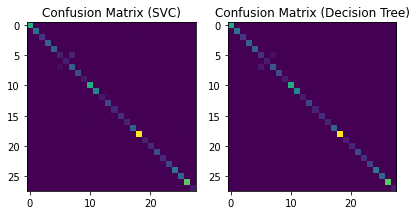

In [102]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(np.argmax(y_test, axis=1), pred1)
cm2 = confusion_matrix(np.argmax(y_test, axis=1), pred2)

plt.subplot(1, 2, 1)
plt.imshow(cm1)
plt.title('Confusion Matrix (SVC)')

plt.subplot(1, 2, 2)
plt.imshow(cm2)
plt.title('Confusion Matrix (Decision Tree)')

plt.tight_layout()
plt.show()

In [104]:
from sklearn.metrics import precision_recall_fscore_support
pr1 = precision_recall_fscore_support(np.argmax(y_test, axis=1), pred1)
pr2 = precision_recall_fscore_support(np.argmax(y_test, axis=1), pred2)

print('SVC\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF-score: {:.2f}%'.format(np.mean(pr1[0])*100, np.mean(pr1[1])*100, np.mean(pr1[2])*100))
print('\nDecision Tree\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF-score: {:.2f}%'.format(np.mean(pr2[0])*100, np.mean(pr2[1])*100, np.mean(pr2[2])*100))

SVC
Precision: 97.16%
Recall: 96.42%
F-score: 96.62%

Decision Tree
Precision: 97.67%
Recall: 97.79%
F-score: 97.72%
